# Part 1: Features of Text


`nltk`: used for tokenizing sentences, generating n-grams, stemming, lemmatization, etc.

`deep_translator` : used for translating between langauges


In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd
import requests
import plotly.express as px
import pandas as pd
import matplotlib.font_manager as fm

### Importing Dataset



In [ ]:
with open('bhagvadnew.txt', 'r', encoding='utf-8') as file:
    sanskrit = file.read()

with open('gita.txt', 'r') as file:
    english = file.read()

print(len(sanskrit))
print(len(english))

69773
110283


### **Futher Exploration: Question 1- Try in different languages?**

Language used is English and Sanskrit



### **Futher Exploration: Question 2- The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?**

The source used here is Kaggle data set: https://www.kaggle.com/datasets/ravisane1/bhagwat-gita-in-english/data

The Dataset consists of Sanksrit and English translated verses of the Bhagvad Gita



### Cleaning up the dataset

Unicode characters for Devanagiri script found from: https://www.unicode.org/charts/PDF/U0900.pdf

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

def cleanup_devanagari(text):
    text = re.sub(r'[^\u0900-\u097F]+', '', text)
    return text

sanskrit = cleanup_devanagari(sanskrit)
english = cleanup(english)

print(len(english), len(sanskrit))
print(english[:100])
print(sanskrit[:100])

85279 59844
idhritirashtrarangedthusforbattleonthesacredplainonkurukshetrasaysanjayasaywhatwroughtmypeopleandthe
धृतराष्ट्रउवाच।धर्मक्षेत्रेकुरुक्षेत्रेसमवेतायुयुत्सवः।मामकाःपाण्डवाश्चैवकिमकुर्वतसञ्जय॥११॥सञ्जयउवाच


In [ ]:
def tuple2string(tup):
  string_ = ''.join(tup)
  return string_

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

### Plotting Unigrams

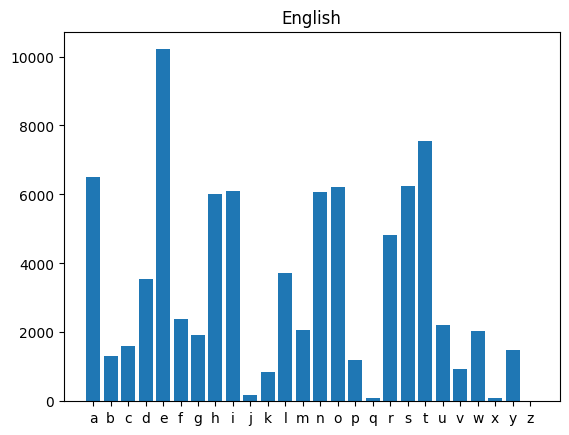

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
unigram_eng1 = Counter(ngrams(english,1))
plothistogram(unigram_eng1)
plt.title('English')
plt.show()

In [ ]:
!!wget https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf?raw=true -O NotoSansDevanagari-Regular.ttf


['--2025-05-23 15:13:55--  https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf?raw=true',
 'Resolving github.com (github.com)... 140.82.112.4',
 'Connecting to github.com (github.com)|140.82.112.4|:443... connected.',
 'HTTP request sent, awaiting response... 301 Moved Permanently',
 'Location: https://github.com/notofonts/noto-fonts/blob/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf?raw=true [following]',
 '--2025-05-23 15:13:56--  https://github.com/notofonts/noto-fonts/blob/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf?raw=true',
 'Reusing existing connection to github.com:443.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: https://github.com/notofonts/noto-fonts/raw/refs/heads/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf [following]',
 '--2025-05-23 15:13:56--  https://github.com/notofonts/noto-fonts/raw/refs/heads/main/hinted/ttf/NotoSansDe

In [ ]:
unigram_sans = Counter(ngrams(sanskrit, 1))

labels = [''.join(i) for i in unigram_sans.keys()]
values = list(unigram_sans.values())

fig = go.Figure(data=[
    go.Bar(x=labels, y=values)
])

fig.update_layout(
    width= 2000,
    xaxis_title="Letters",
    yaxis_title="Frequency",
    font=dict(
        family="Noto Sans Devanagari, sans-serif",
        size=15
    ),
)

fig.show()

## Further Exploration: Question 3- How can we use and visualize trigrams and higher n-grams?

### Bigrams

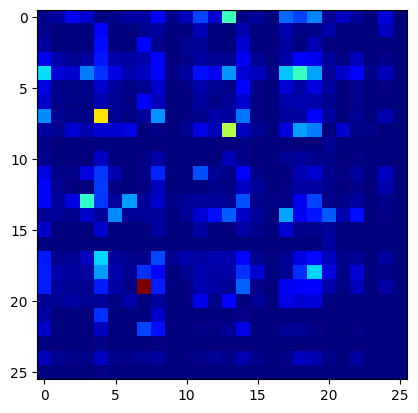

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq


bigram_eng = Counter(ngrams(english,2))

plotbihistogram(bigram_eng)
plt.show()

### Trigrams

In [ ]:
trigram_eng= Counter(ngrams(english,3))
len(trigram_eng)

5012

In [ ]:
data = []
for (c1, c2, c3), freq in trigram_eng.items():
    data.append({'c1': ord(c1) - ord('a'), 'c2': ord(c2) - ord('a'), 'c3': ord(c3) - ord('a'), 'freq': freq})

df = pd.DataFrame(data)

fig = px.scatter_3d(df, x='c1', y='c2', z='c3', size='freq', color='freq',
                    labels={'c1': 'First char', 'c2': 'Second char', 'c3': 'Third char'},
                    title='Trigram 3D Scatter Plot')
fig.show()

# Part 2: Features of an Image

### Importing the Dataset

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Viewing the dataset

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

# PS: seeing how the command works
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]
no4 = train_X[train_y==4,:,:]
no5 = train_X[train_y==5,:,:]
no6 = train_X[train_y==6,:,:]
no7 = train_X[train_y==7,:,:]
no8 = train_X[train_y==8,:,:]
no9 = train_X[train_y==9,:,:]
print(no1)
print(no9)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

## **Feature 1: Intensity of the brightness of the pixels.**

This feature works well in differentiating the class of numbers 0 and 1

 ### **Further Exploration: Question 3- Can you come up with your own features?**

(array([2.840e+02, 1.879e+03, 2.380e+03, 1.430e+03, 5.260e+02, 1.810e+02,
        4.700e+01, 1.100e+01, 3.000e+00, 1.000e+00]),
 array([ 5086. ,  8945.6, 12805.2, 16664.8, 20524.4, 24384. , 28243.6,
        32103.2, 35962.8, 39822.4, 43682. ]),
 <BarContainer object of 10 artists>)

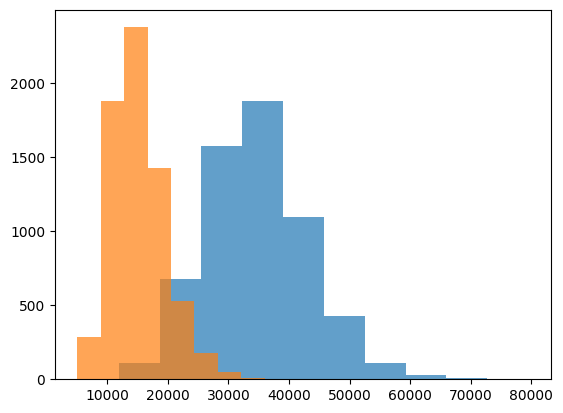

In [ ]:
SUM1 = np.sum(no1, (1 ,2))
SUM0 = np.sum(no0, (1,2))

plt.hist(SUM0, alpha=0.7)
plt.hist(SUM1, alpha=0.7)

### **Further Exploration: Question 4- Will these features work for different classes other than 0 and 1?**

Plotting the summed intensities of the numbers on the histogram, it is clearly visible that this feature doesn't help us to differentiate between more numbers.



### **Further Exploration: Question 5- What will happen if we take more that two classes at a time?**

Overlap between the distributions of summed intensities becomes more significant, and hence the feature is practically useless in multi-class classification

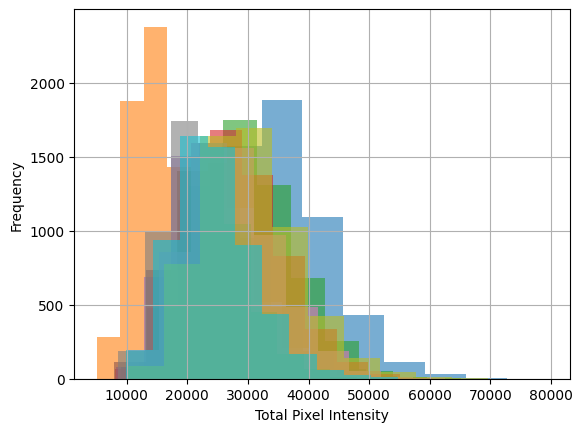

In [ ]:
numbers = [no0, no1, no2, no3, no4, no5, no6, no7, no8, no9]
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

for arr, label in zip(numbers, labels):
    summed = np.sum(arr, axis=(1, 2))
    plt.hist(summed, alpha=0.6, label=label)

plt.xlabel("Total Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()